In [109]:
%load autoreload

ValueError: 'autoreload' was not found in history, as a file, url, nor in the user namespace.

In [110]:
%auoreload

UsageError: Line magic function `%auoreload` not found.


In [42]:
import sys
import torch
from itertools import groupby
from datasets import load_dataset
import matplotlib.pyplot as plt


from charsiu.src.Charsiu import Wav2Vec2ForFrameClassification, CharsiuPreprocessor_en, charsiu_forced_aligner, charsiu_chain_attention_aligner, charsiu_chain_forced_aligner, charsiu_predictive_aligner
from charsiu.src.utils import seq2duration

In [2]:
# download timit
timit = load_dataset('timit_asr', data_dir='/home/tomi/Documents/tesis_speechRate/timit')


/home/tomi/.local/lib/python3.10/site-packages/datasets/load.py:1461: FutureWarning: The repository for timit_asr contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/timit_asr
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


In [3]:
# load data
sample = timit['train'][1]
text = sample['text']
audio_path = sample['file']
print('Text transcription:%s'%(text))
print('Audio path: %s'%audio_path)

Text transcription:Don't ask me to carry an oily rag like that.
Audio path: /home/tomi/Documents/tesis_speechRate/timit/data/TRAIN/DR1/FCJF0/SA2.WAV


Phone recognizer + Neural Forced Alignment

In [16]:
# load model
charsiu = charsiu_chain_attention_aligner(aligner='charsiu/en_w2v2_fs_10ms',recognizer='charsiu/en_w2v2_ctc_libris_and_cv')
charsiu.recognizer

Some weights of the model checkpoint at charsiu/en_w2v2_fs_10ms were not used when initializing Wav2Vec2ForAttentionAlignment: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForAttentionAlignment from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForAttentionAlignment from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForAttentionAlignment were not initialized from the model checkpoint at charsiu/en_w2v2_fs_10ms and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weig

Wav2Vec2ForCTC(
  (wav2vec2): Wav2Vec2Model(
    (feature_extractor): Wav2Vec2FeatureEncoder(
      (conv_layers): ModuleList(
        (0): Wav2Vec2GroupNormConvLayer(
          (conv): Conv1d(1, 512, kernel_size=(10,), stride=(5,), bias=False)
          (activation): GELUActivation()
          (layer_norm): GroupNorm(512, 512, eps=1e-05, affine=True)
        )
        (1-4): 4 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(3,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
        (5-6): 2 x Wav2Vec2NoLayerNormConvLayer(
          (conv): Conv1d(512, 512, kernel_size=(2,), stride=(2,), bias=False)
          (activation): GELUActivation()
        )
      )
    )
    (feature_projection): Wav2Vec2FeatureProjection(
      (layer_norm): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
      (projection): Linear(in_features=512, out_features=768, bias=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder)

In [5]:
alignment = charsiu.align(audio=audio_path)

/home/tomi/Documents/tesis_speechRate/charsiu/src/Charsiu.py:372: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio).float().unsqueeze(0).to(self.device)


In [ ]:


charsiu.recognizer()

In [6]:
print(alignment)
print('\n Ground Truth \n')
print([(s/16000,e/16000,p) for s,e,p in zip(sample['phonetic_detail']['start'],sample['phonetic_detail']['stop'],sample['phonetic_detail']['utterance'])])

[(0.0, 0.1, '[SIL]'), (0.1, 0.13, '[UNK]'), (0.13, 0.17, 'S'), (0.17, 0.19, '[UNK]'), (0.19, 0.22, 'L'), (0.22, 0.26, '[UNK]'), (0.26, 0.28, 'D'), (0.28, 0.32, 'T'), (0.32, 0.38, '[UNK]'), (0.38, 0.39, 'W'), (0.39, 0.43, '[UNK]'), (0.43, 0.48, 'S'), (0.48, 0.52, 'K'), (0.52, 0.55, 'M'), (0.55, 0.59, '[UNK]'), (0.59, 0.6, 'Y'), (0.6, 0.63, 'T'), (0.63, 0.64, '[UNK]'), (0.64, 0.68, 'W'), (0.68, 0.75, 'K'), (0.75, 0.87, '[UNK]'), (0.87, 0.91, 'R'), (0.91, 0.94, '[UNK]'), (0.94, 0.96, 'Y'), (0.96, 0.99, '[UNK]'), (0.99, 1.04, 'N'), (1.04, 1.05, '[UNK]'), (1.05, 1.13, 'Y'), (1.13, 1.18, 'W'), (1.18, 1.19, '[UNK]'), (1.19, 1.2, 'W'), (1.2, 1.24, '[UNK]'), (1.24, 1.32, 'L'), (1.32, 1.41, 'R'), (1.41, 1.55, '[UNK]'), (1.55, 1.6, 'G'), (1.6, 1.63, 'L'), (1.63, 1.74, '[UNK]'), (1.74, 1.75, 'K'), (1.75, 1.76, '[UNK]'), (1.76, 1.79, 'S'), (1.79, 1.87, '[UNK]'), (1.87, 1.97, 'L'), (1.97, 2.04, '[UNK]'), (2.04, 2.14, '[SIL]')]

 Ground Truth 

[(0.0, 0.14125, 'h#'), (0.14125, 0.170625, 'd'), (0.1706

In [7]:
charsiu.serve(audio=audio_path, save_to='sample.TextGrid')

/home/tomi/Documents/tesis_speechRate/charsiu/src/Charsiu.py:372: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio).float().unsqueeze(0).to(self.device)


Alignment output has been saved to sample.TextGrid


In [17]:
# load model
charsiu = charsiu_chain_forced_aligner(aligner='charsiu/en_w2v2_fc_10ms',recognizer=None)

Some weights of the model checkpoint at charsiu/en_w2v2_fc_10ms were not used when initializing Wav2Vec2ForFrameClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForFrameClassification were not initialized from the model checkpoint at charsiu/en_w2v2_fc_10ms and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.

OSError: None is not a local folder and is not a valid model identifier listed on 'https://huggingface.co/models'
If this is a private repository, make sure to pass a token having permission to this repo either by logging in with `huggingface-cli login` or by passing `token=<your_token>`

In [18]:
alignment = charsiu.align(audio=audio_path)

In [19]:
print(alignment)
print('\n Ground Truth \n')
print([(s/16000,e/16000,p) for s,e,p in zip(sample['phonetic_detail']['start'],sample['phonetic_detail']['stop'],sample['phonetic_detail']['utterance'])])

[(0.0, 0.1, '[SIL]'), (0.1, 0.13, '[UNK]'), (0.13, 0.17, 'S'), (0.17, 0.19, '[UNK]'), (0.19, 0.22, 'L'), (0.22, 0.25, '[UNK]'), (0.25, 0.3, 'D'), (0.3, 0.32, 'T'), (0.32, 0.43, '[UNK]'), (0.43, 0.48, 'S'), (0.48, 0.53, 'K'), (0.53, 0.55, 'M'), (0.55, 0.59, '[UNK]'), (0.59, 0.61, 'Y'), (0.61, 0.63, 'T'), (0.63, 0.64, '[UNK]'), (0.64, 0.68, 'W'), (0.68, 0.74, 'K'), (0.74, 0.75, '[UNK]'), (0.75, 0.76, 'K'), (0.76, 0.87, '[UNK]'), (0.87, 0.9, 'R'), (0.9, 0.94, '[UNK]'), (0.94, 0.95, 'Y'), (0.95, 0.99, '[UNK]'), (0.99, 1.04, 'N'), (1.04, 1.06, '[UNK]'), (1.06, 1.14, 'Y'), (1.14, 1.18, 'W'), (1.18, 1.24, '[UNK]'), (1.24, 1.32, 'L'), (1.32, 1.41, 'R'), (1.41, 1.55, '[UNK]'), (1.55, 1.6, 'G'), (1.6, 1.61, 'D'), (1.61, 1.62, 'L'), (1.62, 1.76, '[UNK]'), (1.76, 1.78, 'S'), (1.78, 1.8, 'D'), (1.8, 1.87, '[UNK]'), (1.87, 1.97, 'L'), (1.97, 2.04, '[UNK]'), (2.04, 2.14, '[SIL]')]

 Ground Truth 

[(0.0, 0.14125, 'h#'), (0.14125, 0.170625, 'd'), (0.170625, 0.2575, 'uh'), (0.2575, 0.2875, 'n'), (0.287

In [11]:
charsiu.serve(audio=audio_path, save_to='sample.TextGrid')

Alignment output has been saved to sample.TextGrid


Direct inference with frame classification model

In [12]:
charsiu = charsiu_predictive_aligner(aligner='charsiu/en_w2v2_fc_10ms')

Some weights of the model checkpoint at charsiu/en_w2v2_fc_10ms were not used when initializing Wav2Vec2ForFrameClassification: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForFrameClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForFrameClassification were not initialized from the model checkpoint at charsiu/en_w2v2_fc_10ms and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.

In [13]:
alignment = charsiu.align(audio=audio_path)

In [14]:
print(alignment)
print('\n Ground Truth \n')
print([(s/16000,e/16000,p) for s,e,p in zip(sample['phonetic_detail']['start'],sample['phonetic_detail']['stop'],sample['phonetic_detail']['utterance'])])

[(0.0, 0.1, '[SIL]'), (0.1, 0.19, 'D'), (0.19, 0.2, 'OW'), (0.2, 0.24, 'AH'), (0.24, 0.29, 'N'), (0.29, 0.43, 'AE'), (0.43, 0.48, 'S'), (0.48, 0.52, 'K'), (0.52, 0.55, 'M'), (0.55, 0.59, 'IY'), (0.59, 0.63, 'T'), (0.63, 0.67, 'AH'), (0.67, 0.77, 'K'), (0.77, 0.86, 'EH'), (0.86, 0.91, 'R'), (0.91, 0.94, 'IY'), (0.94, 0.97, 'AH'), (0.97, 1.03, 'N'), (1.03, 1.16, 'OY'), (1.16, 1.18, 'IH'), (1.18, 1.26, 'L'), (1.26, 1.33, 'AH'), (1.33, 1.39, 'R'), (1.39, 1.54, 'AE'), (1.54, 1.58, 'G'), (1.58, 1.62, 'L'), (1.62, 1.69, 'AY'), (1.69, 1.77, 'K'), (1.77, 1.84, 'DH'), (1.84, 2.01, 'AE'), (2.01, 2.04, 'T'), (2.04, 2.14, '[SIL]')]

 Ground Truth 

[(0.0, 0.14125, 'h#'), (0.14125, 0.170625, 'd'), (0.170625, 0.2575, 'uh'), (0.2575, 0.2875, 'n'), (0.2875, 0.429, 'ae'), (0.429, 0.495, 's'), (0.495, 0.516875, 'kcl'), (0.516875, 0.54, 'k'), (0.54, 0.5535, 'm'), (0.5535, 0.595, 'ix'), (0.595, 0.6225, 'dx'), (0.6225, 0.671, 'ix'), (0.671, 0.71875, 'kcl'), (0.71875, 0.78375, 'k'), (0.78375, 0.8459375, 'eh'

In [15]:
charsiu.serve(audio=audio_path, save_to='sample.TextGrid')

Alignment output has been saved to sample.TextGrid


# Rompo Recognizer

In [ ]:
    def align(self, audio):
        '''
        Recognize phones and perform forced alignment

        Parameters
        ----------
        audio : np.ndarray [shape=(n,)]
            time series of speech signal

        Returns
        -------
        A tuple of aligned phones in the form (start_time, end_time, phone)

        '''
        if self.recognizer is None:
            print('A recognizer is not specified. Will use the default recognizer.')
            self.recognizer = Wav2Vec2ForCTC.from_pretrained('charsiu/en_w2v2_ctc_libris_and_cv')
        
        # perform phone recognition
        audio = self.charsiu_processor.audio_preprocess(audio,sr=self.sr)
        audio = torch.tensor(audio).float().unsqueeze(0).to(self.device)
        
        with torch.no_grad():
            out = self.recognizer(audio)
            
        pred_ids = torch.argmax(out.logits,dim=-1).squeeze()
        phones = self.charsiu_processor.processor.tokenizer.convert_ids_to_tokens(pred_ids,skip_special_tokens=True)
        phones = [p for p,group in groupby(phones)]
        phone_ids = self.charsiu_processor.get_phone_ids(phones)
        
        # perform forced alignment
        batch = {'input_values':audio,
         'labels': torch.tensor(phone_ids).unsqueeze(0).long().to(self.device)
        }

        with torch.no_grad():
          out = self.aligner(**batch)
        att = torch.softmax(out.logits,dim=-1)
        
        preds = torch.argmax(att[0],dim=-1).cpu().detach().squeeze().numpy()
        pred_phones = [self.charsiu_processor.mapping_id2phone(phone_ids[i]) for i in preds]
        pred_phones = seq2duration(pred_phones,resolution=self.resolution)
        return pred_phones
    

In [32]:
charsiu_at_al = charsiu_chain_attention_aligner(aligner='charsiu/en_w2v2_fs_10ms',recognizer='charsiu/en_w2v2_ctc_libris_and_cv')


Some weights of the model checkpoint at charsiu/en_w2v2_fs_10ms were not used when initializing Wav2Vec2ForAttentionAlignment: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForAttentionAlignment from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForAttentionAlignment from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForAttentionAlignment were not initialized from the model checkpoint at charsiu/en_w2v2_fs_10ms and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weig

In [101]:
# load data
sample = timit['train'][1]
text = sample['text']
audio_path = sample['file']
print('Text transcription:%s'%(text))
print('Audio path: %s'%audio_path)
audio = sample['audio']['array']

aligner = charsiu_at_al.align(audio_path)
print(aligner)


# perform phone recognition
audio = charsiu_at_al.charsiu_processor.audio_preprocess(audio,sr=charsiu_at_al.sr)
audio = torch.tensor(audio).float().unsqueeze(0).to(charsiu_at_al.device)

with torch.no_grad():
    out = charsiu_at_al.recognizer(audio)

pred_ids = torch.argmax(out.logits,dim=-1).squeeze()
phones = charsiu_at_al.charsiu_processor.processor.tokenizer.convert_ids_to_tokens(pred_ids,skip_special_tokens=True)
phones = [p for p,group in groupby(phones)]
phone_ids = charsiu_at_al.charsiu_processor.get_phone_ids(phones) # TODO: el error puede estar aca

# perform forced alignment
batch = {'input_values':audio,
 'labels': torch.tensor(phone_ids).unsqueeze(0).long().to(charsiu_at_al.device)
}

with torch.no_grad():
  out = charsiu_at_al.aligner(**batch)
att = torch.softmax(out.logits,dim=-1)

preds = torch.argmax(att[0],dim=-1).cpu().detach().squeeze().numpy()
pred_phones = [charsiu_at_al.charsiu_processor.mapping_id2phone(phone_ids[i]) for i in preds]
#pred_phones = seq2duration(pred_phones,resolution=charsiu_at_al.resolution)
print( pred_phones)

Text transcription:Don't ask me to carry an oily rag like that.
Audio path: /home/tomi/Documents/tesis_speechRate/timit/data/TRAIN/DR1/FCJF0/SA2.WAV


/home/tomi/Documents/tesis_speechRate/charsiu/src/Charsiu.py:372: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio).float().unsqueeze(0).to(self.device)


[(0.0, 0.1, '[SIL]'), (0.1, 0.12, '[UNK]'), (0.12, 0.17, 'S'), (0.17, 0.19, '[UNK]'), (0.19, 0.2, 'L'), (0.2, 0.26, '[UNK]'), (0.26, 0.3, 'D'), (0.3, 0.32, 'T'), (0.32, 0.43, '[UNK]'), (0.43, 0.48, 'S'), (0.48, 0.51, 'K'), (0.51, 0.55, 'M'), (0.55, 0.58, '[UNK]'), (0.58, 0.6, 'Y'), (0.6, 0.64, 'T'), (0.64, 0.68, 'W'), (0.68, 0.73, 'K'), (0.73, 0.74, '[UNK]'), (0.74, 0.76, 'K'), (0.76, 0.87, '[UNK]'), (0.87, 0.9, 'R'), (0.9, 0.94, '[UNK]'), (0.94, 0.95, 'Y'), (0.95, 0.98, '[UNK]'), (0.98, 1.02, 'N'), (1.02, 1.05, '[UNK]'), (1.05, 1.15, 'Y'), (1.15, 1.18, 'W'), (1.18, 1.19, '[UNK]'), (1.19, 1.2, 'W'), (1.2, 1.23, '[UNK]'), (1.23, 1.33, 'L'), (1.33, 1.41, 'R'), (1.41, 1.56, '[UNK]'), (1.56, 1.6, 'G'), (1.6, 1.62, 'L'), (1.62, 1.76, '[UNK]'), (1.76, 1.78, 'D'), (1.78, 1.79, 'S'), (1.79, 1.8, 'D'), (1.8, 1.88, '[UNK]'), (1.88, 1.97, 'L'), (1.97, 2.04, '[UNK]'), (2.04, 2.14, '[SIL]')]


/tmp/ipykernel_22846/3609181609.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio).float().unsqueeze(0).to(charsiu_at_al.device)


['[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[SIL]', '[UNK]', '[UNK]', 'S', 'S', 'S', 'S', 'S', '[UNK]', '[UNK]', 'L', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'D', 'D', 'D', 'D', 'T', 'T', 'T', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'S', 'S', 'S', 'S', 'S', 'K', 'K', 'K', 'M', 'M', 'M', 'M', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'Y', 'Y', 'T', 'T', '[UNK]', 'W', 'W', 'W', 'W', 'K', 'K', 'K', 'K', 'K', '[UNK]', '[UNK]', 'K', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'R', 'R', 'R', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'Y', '[UNK]', '[UNK]', '[UNK]', 'N', 'N', 'N', 'N', 'N', '[UNK]', '[UNK]', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'W', 'W', 'W', 'W', 'W', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '[UNK]', '

In [95]:
len(phone_ids)

55

In [105]:
from itertools import groupby, chain
import re

In [106]:
#phones = list(chain.from_iterable(phones))
ids = [charsiu_at_al.charsiu_processor.mapping_phone2id(re.sub(r'\d','',p)) for p in phones]

In [107]:
ids

[0,
 36,
 12,
 7,
 22,
 4,
 38,
 17,
 3,
 8,
 22,
 6,
 17,
 4,
 5,
 8,
 39,
 7,
 34,
 19,
 25,
 32,
 5,
 4,
 31,
 32,
 37,
 17,
 29,
 4,
 22,
 0]

In [89]:
charsiu_at_al.charsiu_processor.get_phone_ids(['AE', 'DH', 'T'])

[0, 40, 40, 36, 40, 22, 0]

In [100]:
phones

['[',
 'S',
 'I',
 'L',
 ']',
 'D',
 'O',
 'W',
 'N',
 'T',
 'A',
 'E',
 'S',
 'K',
 'M',
 'I',
 'Y',
 'T',
 'U',
 'W',
 'K',
 'A',
 'E',
 'R',
 'I',
 'Y',
 'I',
 'H',
 'N',
 'O',
 'Y',
 'W',
 'A',
 'H',
 'L',
 'R',
 'A',
 'E',
 'G',
 'L',
 'A',
 'Y',
 'K',
 'D',
 'H',
 'A',
 'E',
 'T',
 '[',
 'S',
 'I',
 'L',
 ']']

In [90]:
charsiu_at_al.charsiu_processor.processor.tokenizer.convert_ids_to_tokens([0, 40, 40, 36, 40, 22, 0],skip_special_tokens=True)


['[SIL]', 'D', 'T', '[SIL]']

In [91]:
lista = [0, 40, 40, 36, 40, 22, 0]
[charsiu_at_al.charsiu_processor.mapping_id2phone(i) for i in lista]


['[SIL]', '[UNK]', '[UNK]', 'D', '[UNK]', 'T', '[SIL]']

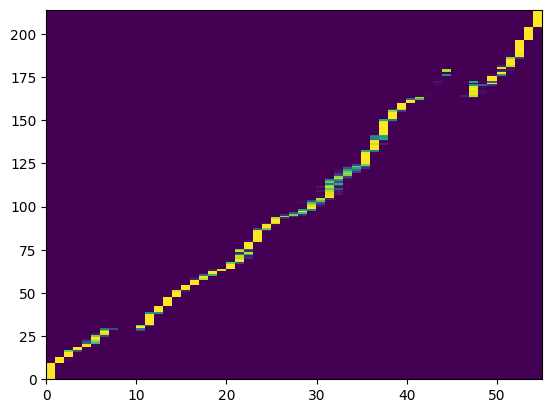

In [92]:
import matplotlib.pyplot as plt
plt.pcolor(att[0])

In [93]:
charsiu_at_al.charsiu_processor.

SyntaxError: invalid syntax (2867358495.py, line 1)

In [94]:
len(sample['phonetic_detail']['utterance'])

31

/tmp/ipykernel_22846/2673428831.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  audio = torch.tensor(audio).float().unsqueeze(0).to(charsiu.device)
